In [1]:
#사용 라이브러리
import numpy as np
import pandas as pd
from tqdm import tqdm
import folium
from folium.plugins import MarkerCluster
from lxml import html
import time
import requests, bs4
import json
pd.set_option('display.max_columns', 500)

In [13]:
df = pd.read_csv('E:/parcel_10640982.csv', encoding='UTF-8', sep="|", error_bad_lines=False)

In [21]:
df['YMD']=pd.to_datetime(df['YMD'],format="%Y%m%d")

In [22]:
df

,Unnamed: 0,Unnamed: 0.1,REGI_POCD,PO_NM,ZIP_CD,PO_ADDR,REGI_NO,REC_ADDR_SEQ,WGHT,VOL,경도,위도,YMD
0,15,15,40013,서인천우체국,22713,인천광역시 서구 서곶로 318 (심곡동),6.865151e+12,2.021110e+15,2000.0,60.0,126.665392,37.518077,2021-11-02
1,16,16,40013,서인천우체국,22713,인천광역시 서구 서곶로 318 (심곡동),6.865151e+12,2.021110e+15,2000.0,60.0,126.631496,37.527216,2021-11-02
2,17,17,40013,서인천우체국,22713,인천광역시 서구 서곶로 318 (심곡동),6.865151e+12,2.021110e+15,2000.0,60.0,126.668336,37.534169,2021-11-02
3,18,18,40013,서인천우체국,22713,인천광역시 서구 서곶로 318 (심곡동),6.865151e+12,2.021110e+15,2000.0,60.0,126.631496,37.527216,2021-11-02
4,19,19,40013,서인천우체국,22713,인천광역시 서구 서곶로 318 (심곡동),6.865152e+12,2.021110e+15,2000.0,60.0,126.676204,37.519568,2021-11-02


In [17]:
lat = df['위도'].mean()
long = df['경도'].mean()
m = folium.Map([lat,long],zoom_start=10)

In [ ]:
for i in df.index:
    sub_lat =  df.loc[i,'위도']
    sub_long = df.loc[i,'경도']
    title = df.loc[i,'PO_NM']            
    #지도에 데이터 찍어서 보여주기
    folium.CircleMarker([sub_lat,sub_long],tooltip = title, color='blue', fill_color='blue',radius = 30).add_to(m)
    folium.Marker([sub_lat,sub_long],icon=folium.Icon(color='orange', icon='child', prefix='fa'),tooltip='어린이보호구역').add_to(m)

In [2]:
import os
import time
import pandas as pd
from tqdm import tqdm 
import sys
pd.options.display.max_columns = 500

In [12]:
path_dir='E:/incheon/'
file_list = os.listdir(path_dir)

In [4]:
def plot(df):
    # 리스트를 이용해 여러 행의 데이터를 위,경도로 묶음
    locations = list(zip(df.위도, df.경도))
    # 반복문을 이용해 locations로 정의한 변수에 해당하는 위치에 자동차 모양의 빨간색 아이콘을 지정했다.
    icons = [folium.Icon(icon="box", prefix="fa", color="green") for _ in range(len(locations))]


    # 클러스터를 생성하여 앞에서 지정한 locations, icons을 설정해준다.
    cluster = MarkerCluster(locations = locations, icons = icons)
    # 지도에 클러스터를 추가.
    cluster.add_to(m)

In [14]:
for i in tqdm(file_list):
    df = pd.read_csv(path_dir+i, encoding='UTF-8', sep="|", error_bad_lines=False)
    df['YMD']=i[7:15]
    df=df.dropna()
    df=df.dropna(subset=['위도'])
    df=df.dropna(subset=['경도'])
    lat = df['위도'].mean()
    long = df['경도'].mean()
    if df.empty:
        print('file: '+i+ ' is empty')
    else:
        m = folium.Map([lat,long],zoom_start=10)
        plot(df)
        m.save('E:/visual/parcel-data_'+i[7:15]+'.html')

 14%|██████████▊                                                                    | 42/306 [20:38<1:38:52, 22.47s/it]

file: parcel_20210212_129.csv is empty
file: parcel_20210213_129.csv is empty


 85%|██████████████████████████████████████████████████████████████████▌           | 261/306 [1:58:53<19:41, 26.25s/it]

file: parcel_20210919_129.csv is empty
file: parcel_20210920_129.csv is empty
file: parcel_20210921_129.csv is empty


100%|██████████████████████████████████████████████████████████████████████████████| 306/306 [2:19:06<00:00, 27.28s/it]


In [154]:
logistics_GPS = pd.read_csv('E:/post/logistics_GPS.csv', encoding='UTF-8', sep="|", error_bad_lines=False)
basecamp_GPS = pd.read_csv('E:/post/basecamp_geo.csv', encoding='UTF-8', sep="|", error_bad_lines=False)
df = pd.read_csv('E:/parcel_10640982.csv', encoding='UTF-8', sep="|", error_bad_lines=False)

In [155]:
df=df.dropna(subset=['위도'])
df=df.dropna(subset=['경도'])

In [156]:
df.head()

,Unnamed: 0,Unnamed: 0.1,REGI_POCD,PO_NM,ZIP_CD,PO_ADDR,REGI_NO,REC_ADDR_SEQ,WGHT,VOL,경도,위도,YMD
0,15,15,40013,서인천우체국,22713,인천광역시 서구 서곶로 318 (심곡동),6.865151e+12,2.021110e+15,2000.0,60.0,126.665392,37.518077,20211102
1,16,16,40013,서인천우체국,22713,인천광역시 서구 서곶로 318 (심곡동),6.865151e+12,2.021110e+15,2000.0,60.0,126.631496,37.527216,20211102
2,17,17,40013,서인천우체국,22713,인천광역시 서구 서곶로 318 (심곡동),6.865151e+12,2.021110e+15,2000.0,60.0,126.668336,37.534169,20211102
3,18,18,40013,서인천우체국,22713,인천광역시 서구 서곶로 318 (심곡동),6.865151e+12,2.021110e+15,2000.0,60.0,126.631496,37.527216,20211102
4,19,19,40013,서인천우체국,22713,인천광역시 서구 서곶로 318 (심곡동),6.865152e+12,2.021110e+15,2000.0,60.0,126.676204,37.519568,20211102


In [21]:
basecamp_GPS

,Unnamed: 0,구분,소재지,경도,위도,GPS
0,0,거점1,인천광역시 중구 서해대로 94번길 100,126.628037,37.430990,"126.6280371,37.4309900"
1,1,거점2,인천광역시 서구 원창동 391-28,126.632780,37.508902,"126.6327801,37.5089016"


In [167]:
import numbers
import math

class GeoUtil:
    """
    Geographical Utils
    """
    @staticmethod
    def degree2radius(degree):
        return degree * (math.pi/180)
    
    @staticmethod
    def get_harversion_distance(x1, y1, x2, y2, round_decimal_digits=5):
        """
        경위도 (x1,y1)과 (x2,y2) 점의 거리를 반환
        Harversion Formula 이용하여 2개의 경위도간 거래를 구함(단위:Km)
        """
        if x1 is None or y1 is None or x2 is None or y2 is None:
            return None
        assert isinstance(x1, numbers.Number) and -180 <= x1 and x1 <= 180
        assert isinstance(y1, numbers.Number) and  -90 <= y1 and y1 <=  90
        assert isinstance(x2, numbers.Number) and -180 <= x2 and x2 <= 180
        assert isinstance(y2, numbers.Number) and  -90 <= y2 and y2 <=  90

        R = 6371 # 지구의 반경(단위: km)
        dLon = GeoUtil.degree2radius(x2-x1)    
        dLat = GeoUtil.degree2radius(y2-y1)

        a = math.sin(dLat/2) * math.sin(dLat/2) \
            + (math.cos(GeoUtil.degree2radius(y1)) \
              *math.cos(GeoUtil.degree2radius(y2)) \
              *math.sin(dLon/2) * math.sin(dLon/2))
        b = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        return round(R * b, round_decimal_digits)

    @staticmethod
    def get_euclidean_distance(x1, y1, x2, y2, round_decimal_digits=5):        
        """
        유클리안 Formula 이용하여 (x1,y1)과 (x2,y2) 점의 거리를 반환
        """
        if x1 is None or y1 is None or x2 is None or y2 is None:
            return None
        assert isinstance(x1, numbers.Number) and -180 <= x1 and x1 <= 180
        assert isinstance(y1, numbers.Number) and  -90 <= y1 and y1 <=  90
        assert isinstance(x2, numbers.Number) and -180 <= x2 and x2 <= 180
        assert isinstance(y2, numbers.Number) and  -90 <= y2 and y2 <=  90

        dLon = abs(x2-x1) # 경도 차이
        if dLon >= 180:   # 반대편으로 갈 수 있는 경우
            dLon -= 360   # 반대편 각을 구한다
        dLat = y2-y1      # 위도 차이
        return round(math.sqrt(pow(dLon,2)+pow(dLat,2)),round_decimal_digits)

In [45]:
print(get_harversion_mtrix(126.97842, 37.56368))

None


In [63]:
base=np.array(x)

In [64]:
base.mean()

7.920695371376446

In [122]:
import re
vol=[]
for i in tqdm(file_list):
    vol.append([i[7:15],re.sub(r'[^0-9]','',i[16:])])

100%|████████████████████████████████████████████████████████████████████████████| 306/306 [00:00<00:00, 153395.13it/s]


In [138]:
df_vol=pd.DataFrame()
vol = np.array(vol)
df_vol['YMD'] = vol[:, 0]
df_vol['YMD']=pd.to_datetime(df_vol['YMD'],format="%Y%m%d")
df_vol['Volume'] = vol[:, 1]
df_vol['Volume'] = pd.to_numeric(df_vol['Volume'])

<AxesSubplot:xlabel='YMD', ylabel='Volume'>

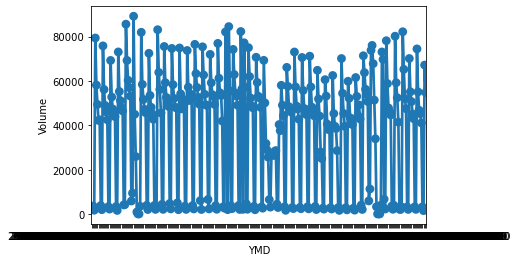

In [139]:
import seaborn as sns
sns.pointplot(data=df_vol, x='YMD',y='Volume')

In [157]:
logistics_GPS.head()

,Unnamed: 0,상호,소재지,경도,위도,GPS
0,0,(주)예인물류,인천광역시 중구 월미로 206 (북성동1가),126.599227,37.478978,"126.5992272,37.4789776"
1,1,주식회사 디와이물류,인천광역시 서구 백범로910번길 27 (가좌동),126.657458,37.489539,"126.6574577,37.4895395"
2,2,씨제이대한통운(주),인천광역시 중구 서해대로209번길 13 (항동7가),126.621837,37.446234,"126.6218369,37.4462342"
3,3,(주)다해통상,인천광역시 중구 서해대로293번길 117 (항동7가),126.614417,37.457151,"126.6144167,37.4571513"
4,4,씨제이대한통운㈜,"인천광역시 계양구 아나지로 529-1, 계양1SUB, 계양2SUB (서운동)",126.751713,37.526551,"126.7517132,37.5265515"


In [172]:
res=[]
for j in tqdm(logistics_GPS.index):
    lat =  logistics_GPS.loc[j,'위도']
    long = logistics_GPS.loc[j,'경도']    
    x=[]
    for i in df.index:
        sub_lat =  df.loc[i,'위도']
        sub_long = df.loc[i,'경도']
        x.append(min(GeoUtil.get_harversion_distance(sub_long, sub_lat, 126.6280371,37.4309900),GeoUtil.get_harversion_distance(sub_long, sub_lat, 126.6327801,37.5089016),GeoUtil.get_harversion_distance(sub_long, sub_lat,long, lat)))
    base=np.array(x)
    res.append(base.mean())

100%|███████████████████████████████████████████████████████████████████████████████| 22/22 [3:20:42<00:00, 547.38s/it]


,Unnamed: 0,상호,소재지,경도,위도,GPS
0,0,(주)예인물류,인천광역시 중구 월미로 206 (북성동1가),126.599227,37.478978,"126.5992272,37.4789776"
1,1,주식회사 디와이물류,인천광역시 서구 백범로910번길 27 (가좌동),126.657458,37.489539,"126.6574577,37.4895395"
2,2,씨제이대한통운(주),인천광역시 중구 서해대로209번길 13 (항동7가),126.621837,37.446234,"126.6218369,37.4462342"
3,3,(주)다해통상,인천광역시 중구 서해대로293번길 117 (항동7가),126.614417,37.457151,"126.6144167,37.4571513"
4,4,씨제이대한통운㈜,"인천광역시 계양구 아나지로 529-1, 계양1SUB, 계양2SUB (서운동)",126.751713,37.526551,"126.7517132,37.5265515"
5,5,롯데글로벌로지스(주),"인천광역시 계양구 아나지로 538-15, 부천집배센터 (서운동)",126.752631,37.524530,"126.7526311,37.5245303"
6,6,(주)농협물류 인천영업소,인천광역시 중구 서해대로293번길 117 (항동7가),126.614417,37.457151,"126.6144167,37.4571513"
7,7,(주)엘엑스판토스,"인천광역시 남동구 논현고잔로 117 (고잔동, LG전자 인천물류센터)",126.711942,37.394249,"126.7119416,37.3942494"
8,8,삼영물류(주),인천광역시 서구 건지로 100 (가좌동),126.653651,37.498704,"126.6536506,37.4987036"
9,9,씨제이대한통운(주),인천광역시 미추홀구 학익동 587-158,126.646629,37.438572,"126.6466286,37.4385725"


In [173]:
res

[7.798109870797641,
 7.093364592424828,
 7.842735684721571,
 7.824245212437153,
 6.513985202789562,
 6.510074059804832,
 7.824245212437153,
 7.219309231144275,
 7.252332039203708,
 7.394302493842196,
 7.836776594474072,
 7.83828095939642,
 7.865599877219973,
 7.862608587058045,
 7.833323954114389,
 7.833323954114389,
 7.833380274259463,
 7.822591883927623,
 7.029358551488946,
 7.572277596860886,
 7.498010825249961,
 7.804518622649686]